# Trainable Activation Function

This is an experiment to set activation functions to polynomials so that activation functions are trainable.

1. It does work, however, the trainable activation function is strange due to its shape, especially the negative slope around $x=0$ in some trials. Maybe this result suggests us that we should use activation functions whose slopes are negative around $x=0$?
2. By the way, the training is harder than that when the traditional activation functions are chosen. It is caused by the large input of a hidden layer and worsen by polynomial growth of activation function. Maybe the solution is to use batch normalization to shrink the input.
3. The batch normalization works very well! It not only shrink the input of the hidden layer but also soften the loss and accuracy curve, forbid very high loss at begining, and reduce the training epoch.
3. The Trainable activation function improve the accuracy slightly.
4. Every trial we get very different activation function, what does it mean?

In [1]:
import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('../MNIST_data', one_hot=True)

/Users/william/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Extracting ../MNIST_data/train-images-idx3-ubyte.gz
Extracting ../MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../MNIST_data/t10k-labels-idx1-ubyte.gz


# Basic Neural Network: no hidden layer
### #weight = 7840

In [2]:
lr = 0.001
batch_size = 128

n_input = 28*28
n_classes = 10
epoch = 30

In [3]:
x = tf.placeholder(tf.float32, shape=[None, n_input], name='input')
y = tf.placeholder(tf.float32, shape=[None, n_classes], name='output')

In [4]:
W = tf.Variable(tf.random_uniform(shape=[n_input, n_classes], minval=-1., maxval=1., name='W'))
b = tf.Variable(tf.constant(value=0., shape=[n_classes]), name='b')

In [5]:
def DNN_1(X, weight, bias):
    output = tf.matmul(X, weight) + b
    return output

In [6]:
pred = DNN_1(x, W, b)

In [7]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=pred))
train_op = tf.train.AdamOptimizer(lr).minimize(loss)

In [8]:
correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, dtype=tf.float32))

In [9]:
init = tf.global_variables_initializer()

In [12]:
loss_list = []
accuracy_list = []

with tf.Session() as sess:
    sess.run(init)
    
    batch = int(mnist.train.num_examples / batch_size)
    test_x = mnist.test.images.reshape([-1, n_input])
    test_y = mnist.test.labels
    
    for _ in tqdm_notebook(range(epoch)):
        for _ in range(batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            batch_x = batch_x.reshape([-1, n_input])
            _, _loss = sess.run([train_op, loss], feed_dict={x: batch_x, y: batch_y})
            loss_list.append(_loss)
        
        _accuracy = sess.run(accuracy, feed_dict={x: test_x, y:test_y})
        accuracy_list.append(_accuracy)

A Jupyter Widget

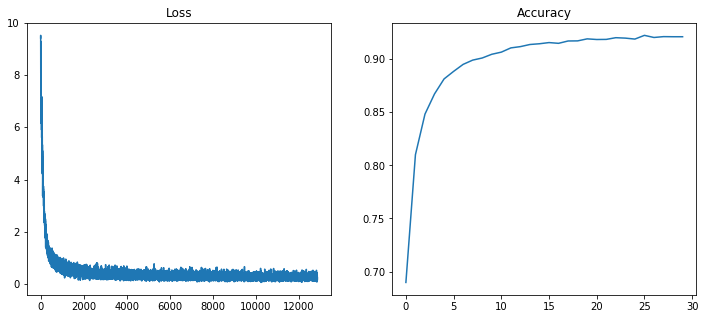

In [14]:
fig = plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(loss_list)
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(accuracy_list)
plt.title('Accuracy')

In [15]:
print('Best loss:', np.min(loss_list))
print('Best accurracy:', np.max(accuracy_list))

Best loss: 0.0680992
Best accurracy: 0.9223


# Basic Neural Network: 1 hidden layer, sigmoid
### #weight = 7840 + 100 = 7940

In [16]:
lr = 0.001
batch_size = 128

n_input = 28*28
n_classes = 10
epoch = 30

In [17]:
x = tf.placeholder(tf.float32, shape=[None, n_input], name='input')
y = tf.placeholder(tf.float32, shape=[None, n_classes], name='output')

In [18]:
W = {0: tf.Variable(tf.random_uniform(shape=[n_input, n_classes], minval=-1., maxval=1., name='W_1')),
     1: tf.Variable(tf.random_uniform(shape=[n_classes, n_classes], minval=-1., maxval=1., name='W_2'))}
b = {0: tf.Variable(tf.constant(value=0., shape=[n_classes]), name='b_1'),
     1: tf.Variable(tf.constant(value=0., shape=[n_classes]), name='b_2')}

In [19]:
def DNN_2(X, weight, bias):
    output = tf.matmul(X, weight[0]) + bias[0]
    z_range = tf.reduce_min(output), tf.reduce_max(output)
    output = tf.nn.sigmoid(output)
    output = tf.matmul(output, weight[1]) + bias[1]
    
    return z_range, output

In [20]:
z_range, pred = DNN_2(x, W, b)

In [21]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=pred))
train_op = tf.train.AdamOptimizer(lr).minimize(loss)

In [22]:
correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, dtype=tf.float32))

In [23]:
init = tf.global_variables_initializer()

In [24]:
loss_list = []
accuracy_list = []

with tf.Session() as sess:
    sess.run(init)
    
    batch = int(mnist.train.num_examples / batch_size)
    test_x = mnist.test.images.reshape([-1, n_input])
    test_y = mnist.test.labels
    
    for _ in tqdm_notebook(range(epoch)):
        for _ in range(batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            batch_x = batch_x.reshape([-1, n_input])
            _, _loss = sess.run([train_op, loss], feed_dict={x: batch_x, y: batch_y})
            loss_list.append(_loss)
            
        _z_range, _accuracy = sess.run([z_range, accuracy], feed_dict={x: test_x, y:test_y})
        accuracy_list.append(_accuracy)
        print('z range:', _z_range)

A Jupyter Widget

z range: (-35.255547, 23.033518)
z range: (-32.471809, 31.13628)
z range: (-36.392761, 37.902946)
z range: (-39.261528, 40.202816)
z range: (-40.810432, 41.98954)
z range: (-42.340981, 43.315758)
z range: (-44.172352, 43.943077)
z range: (-44.452942, 44.484718)
z range: (-45.919453, 45.264809)
z range: (-46.500435, 45.136623)
z range: (-47.170406, 44.827747)
z range: (-47.354782, 46.029373)
z range: (-48.340164, 46.039928)
z range: (-48.264484, 47.376358)
z range: (-49.321327, 47.107433)
z range: (-49.681732, 48.64819)
z range: (-49.787449, 49.624348)
z range: (-50.277363, 51.036453)
z range: (-50.508083, 52.183239)
z range: (-51.115059, 53.030327)
z range: (-51.510075, 53.309299)
z range: (-51.921906, 54.996567)
z range: (-52.308468, 55.07996)
z range: (-52.455978, 55.809956)
z range: (-53.343544, 56.766251)
z range: (-53.43557, 57.373371)
z range: (-53.54554, 57.407585)
z range: (-54.39151, 58.109089)
z range: (-54.431381, 59.283005)
z range: (-54.641525, 59.965755)



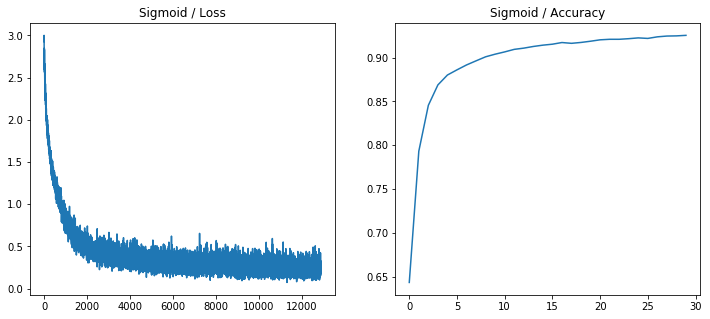

In [25]:
fig = plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(loss_list)
plt.title('Sigmoid / Loss')

plt.subplot(1, 2, 2)
plt.plot(accuracy_list)
plt.title('Sigmoid / Accuracy')

In [27]:
print('Best loss:', np.min(loss_list))
print('Best accurracy:', np.max(accuracy_list))

Best loss: 0.0720932
Best accurracy: 0.9255


# BN Neural Network: 1 hidden layer, 1 batch normalization, sigmoid

In [32]:
lr = 0.001
batch_size = 128

n_input = 28*28
n_classes = 10
epoch = 50

In [33]:
x = tf.placeholder(tf.float32, shape=[None, n_input], name='input')
y = tf.placeholder(tf.float32, shape=[None, n_classes], name='output')

In [34]:
W = {0: tf.Variable(tf.random_uniform(shape=[n_input, n_classes], minval=-1., maxval=1., name='W_1')),
     1: tf.Variable(tf.random_uniform(shape=[n_classes, n_classes], minval=-1., maxval=1., name='W_2'))}
b = {0: tf.Variable(tf.constant(value=0., shape=[n_classes]), name='b_1'),
     1: tf.Variable(tf.constant(value=0., shape=[n_classes]), name='b_2')}

In [35]:
def DNN_2(X, weight, bias):
    output = tf.matmul(X, weight[0]) + bias[0] # (batch_size, n_classes)
    
    mean, var = tf.nn.moments(x=output, axes=[0]) # (n_classes,)=(1, n_classes)
    output = tf.div(tf.subtract(output, mean), var) # (batch_size, n_classes)
    
    output = tf.nn.sigmoid(output)
    output = tf.matmul(output, weight[1]) + bias[1]
    
    return output

In [36]:
pred = DNN_2(x, W, b)

In [37]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=pred))
train_op = tf.train.AdamOptimizer(lr).minimize(loss)

In [38]:
correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, dtype=tf.float32))

In [39]:
init = tf.global_variables_initializer()

In [40]:
loss_list = []
accuracy_list = []

with tf.Session() as sess:
    sess.run(init)
    
    batch = int(mnist.train.num_examples / batch_size)
    test_x = mnist.test.images.reshape([-1, n_input])
    test_y = mnist.test.labels
    
    for _ in tqdm_notebook(range(epoch)):
        for _ in range(batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            batch_x = batch_x.reshape([-1, n_input])
            _, _loss = sess.run([train_op, loss], feed_dict={x: batch_x, y: batch_y})
            loss_list.append(_loss)
            
        _accuracy = sess.run(accuracy, feed_dict={x: test_x, y:test_y})
        accuracy_list.append(_accuracy)

A Jupyter Widget

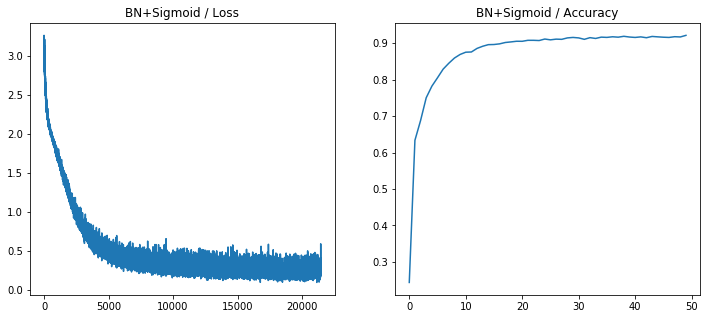

In [41]:
fig = plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(loss_list)
plt.title('BN+Sigmoid / Loss')

plt.subplot(1, 2, 2)
plt.plot(accuracy_list)
plt.title('BN+Sigmoid / Accuracy')

In [42]:
print('Best loss:', np.min(loss_list))
print('Best accurracy:', np.max(accuracy_list))

Best loss: 0.0975417
Best accurracy: 0.9214


# Neural Network with Trainable Activation function

### #weight = 7840 + 100
### #power = 4
### #total weight =  7840 + 100 + power = 7944

In [92]:
lr = 0.001
batch_size = 128

n_input = 28*28
n_power = 8
n_classes = 10
epoch = 100

In [93]:
x = tf.placeholder(tf.float32, shape=[None, n_input], name='input')
y = tf.placeholder(tf.float32, shape=[None, n_classes], name='output')

In [94]:
W = {0: tf.Variable(tf.random_uniform(shape=[n_input, n_classes], minval=-1., maxval=1., name='W_1')),
     1: tf.Variable(tf.random_uniform(shape=[n_classes, n_classes], minval=-1., maxval=1., name='W_2'))}
b = {0: tf.Variable(tf.constant(value=0., shape=[n_classes]), name='b_1'),
     1: tf.Variable(tf.constant(value=0., shape=[n_classes]), name='b_2')}

In [95]:
a = tf.Variable(tf.multiply(tf.convert_to_tensor([10**(-i) for i in range(n_power)]),
                            tf.random_normal(stddev=1, shape=[n_power]))
                , name='a')

In [96]:
def DNN_test(X, weight, bias, a, n_power):
    z = tf.matmul(X, weight[0]) + bias[0] # (batch_size, n_classes)
    
    z_power_list = [tf.pow(z, i) for i in range(n_power)]
    z_power = tf.convert_to_tensor(z_power_list) # (n_power, batch_size, n_classes)
    
    a = tf.expand_dims(a, 1)  # (n_power, 1)
    a = tf.expand_dims(a, -1) # (n_power, 1, 1)
    output = tf.reduce_sum(tf.multiply(a, z_power), axis=0) # (batch_size, n_classes)
    
    output = tf.matmul(output, weight[1]) + bias[1]
    
    return output

In [97]:
pred = DNN_test(x, W, b, a, n_power)

In [98]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=pred))
train_op = tf.train.AdamOptimizer(lr).minimize(loss)

In [99]:
correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, dtype=tf.float32))

In [100]:
init = tf.global_variables_initializer()

In [101]:
loss_list = []
accuracy_list = []

with tf.Session() as sess:
    sess.run(init)
    
    batch = int(mnist.train.num_examples / batch_size)
    test_x = mnist.test.images.reshape([-1, n_input])
    test_y = mnist.test.labels
    
    for _ in tqdm_notebook(range(epoch)):
        for _ in range(batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            batch_x = batch_x.reshape([-1, n_input])
            _, _loss = sess.run([train_op, loss], feed_dict={x: batch_x, y: batch_y})
            loss_list.append(_loss)
            
        _accuracy, coefficients = sess.run([accuracy, a], feed_dict={x: test_x, y:test_y})
        accuracy_list.append(_accuracy)
            
#         print('z range:', _z_range)
#         print('a:', coefficients)

A Jupyter Widget

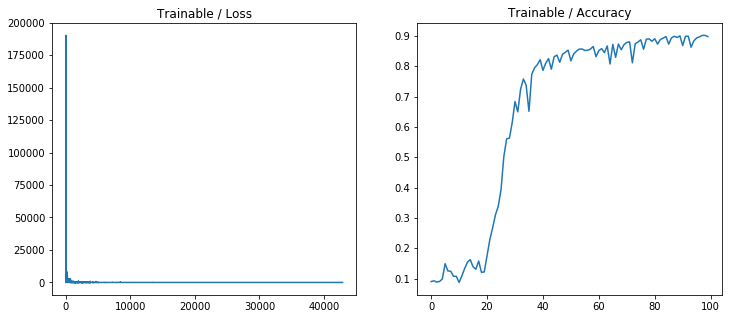

In [102]:
fig = plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(loss_list)
plt.title('Trainable / Loss')

plt.subplot(1, 2, 2)
plt.plot(accuracy_list)
plt.title('Trainable / Accuracy')

In [103]:
print('Best loss:', np.min(loss_list))
print('Best accurracy:', np.max(accuracy_list))

Best loss: 0.116646
Best accurracy: 0.9015


In [104]:
coefficients

array([  7.39379883e-01,  -4.56817913e+00,  -2.92838722e-01,
        -7.63187036e-02,  -2.25123242e-02,   1.92746632e-02,
         2.86431471e-03,  -1.12418341e-03], dtype=float32)

In [107]:
x = np.arange(-5., 5., 0.1)
x_power = [x**i for i in range(len(coefficients))]
trainable_activation = np.sum(np.expand_dims(coefficients, 1) * x_power, 0)

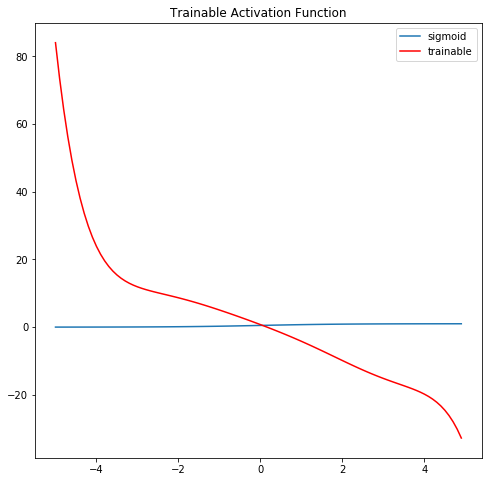

In [108]:
fig = plt.figure(figsize=(8, 8))
plt.plot(x, 1/(1+np.exp(-x)), label='sigmoid')
plt.plot(x, trainable_activation, 'r', label='trainable')
plt.title('Trainable Activation Function')
plt.legend()

# Trainable Activation function: 1 hidden layer, 1 batch normalization

### #weight = 7840 + 100
### #power = 4
### #total weight =  7840 + 100 + power = 7944

In [61]:
lr = 0.001
batch_size = 128

n_input = 28*28
n_power = 8
n_classes = 10
epoch = 50

In [62]:
x = tf.placeholder(tf.float32, shape=[None, n_input], name='input')
y = tf.placeholder(tf.float32, shape=[None, n_classes], name='output')

In [63]:
W = {0: tf.Variable(tf.random_uniform(shape=[n_input, n_classes], minval=-1., maxval=1., name='W_1')),
     1: tf.Variable(tf.random_uniform(shape=[n_classes, n_classes], minval=-1., maxval=1., name='W_2'))}
b = {0: tf.Variable(tf.constant(value=0., shape=[n_classes]), name='b_1'),
     1: tf.Variable(tf.constant(value=0., shape=[n_classes]), name='b_2')}

In [64]:
a = tf.Variable(tf.multiply(tf.convert_to_tensor([2**(-i) for i in range(n_power)]),
                            tf.random_normal(stddev=1, shape=[n_power]))
                , name='a')

In [65]:
def DNN_test(X, weight, bias, a, n_power):
    z = tf.matmul(X, weight[0]) + bias[0] # (batch_size, n_classes)
    
    mean, var = tf.nn.moments(x=z, axes=[0]) # (n_classes,)=(1, n_classes)
    z = tf.div(tf.subtract(z, mean), var) # (batch_size, n_classes)
    
    z_power_list = [tf.pow(z, i) for i in range(n_power)]
    z_power = tf.convert_to_tensor(z_power_list) # (n_power, batch_size, n_classes)
    
    a = tf.expand_dims(a, 1)  # (n_power, 1)
    a = tf.expand_dims(a, -1) # (n_power, 1, 1)
    output = tf.reduce_sum(tf.multiply(a, z_power), axis=0) # (batch_size, n_classes)
    
    output = tf.matmul(output, weight[1]) + bias[1]
    
    return output

In [66]:
pred = DNN_test(x, W, b, a, n_power)

In [67]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=pred))
train_op = tf.train.AdamOptimizer(lr).minimize(loss)

In [68]:
correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, dtype=tf.float32))

In [69]:
init = tf.global_variables_initializer()

In [73]:
loss_list = []
accuracy_list = []

with tf.Session() as sess:
    sess.run(init)
    
    batch = int(mnist.train.num_examples / batch_size)
    test_x = mnist.test.images.reshape([-1, n_input])
    test_y = mnist.test.labels
    
    for i in tqdm_notebook(range(epoch)):
        for _ in range(batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            batch_x = batch_x.reshape([-1, n_input])
            _, _loss = sess.run([train_op, loss], feed_dict={x: batch_x, y: batch_y})
            loss_list.append(_loss)
            
        _accuracy, coefficients = sess.run([accuracy, a], feed_dict={x: test_x, y:test_y})
        accuracy_list.append(_accuracy)
        print('Epoch:%d, accuracy:'%i, _accuracy)

A Jupyter Widget

Epoch:0, accuracy: 0.6587
Epoch:1, accuracy: 0.7943
Epoch:2, accuracy: 0.8341
Epoch:3, accuracy: 0.8563
Epoch:4, accuracy: 0.8709
Epoch:5, accuracy: 0.8821
Epoch:6, accuracy: 0.8906
Epoch:7, accuracy: 0.8957
Epoch:8, accuracy: 0.9011
Epoch:9, accuracy: 0.9055
Epoch:10, accuracy: 0.9073
Epoch:11, accuracy: 0.9111
Epoch:12, accuracy: 0.9122
Epoch:13, accuracy: 0.9123
Epoch:14, accuracy: 0.9151
Epoch:15, accuracy: 0.9159
Epoch:16, accuracy: 0.9154
Epoch:17, accuracy: 0.9166
Epoch:18, accuracy: 0.9172
Epoch:19, accuracy: 0.9176
Epoch:20, accuracy: 0.9184
Epoch:21, accuracy: 0.9195
Epoch:22, accuracy: 0.92
Epoch:23, accuracy: 0.9207
Epoch:24, accuracy: 0.9216
Epoch:25, accuracy: 0.9221
Epoch:26, accuracy: 0.9222
Epoch:27, accuracy: 0.9232
Epoch:28, accuracy: 0.9233
Epoch:29, accuracy: 0.9219
Epoch:30, accuracy: 0.9237
Epoch:31, accuracy: 0.9235
Epoch:32, accuracy: 0.9233
Epoch:33, accuracy: 0.9241
Epoch:34, accuracy: 0.9237
Epoch:35, accuracy: 0.9252
Epoch:36, accuracy: 0.9263
Epoch:37, acc

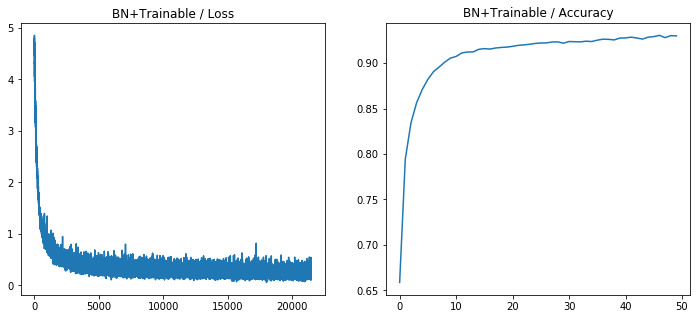

In [74]:
fig = plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(loss_list)
plt.title('BN+Trainable / Loss')

plt.subplot(1, 2, 2)
plt.plot(accuracy_list)
plt.title('BN+Trainable / Accuracy')

In [75]:
print('Best loss:', np.min(loss_list))
print('Best accurracy:', np.max(accuracy_list))

Best loss: 0.0579587
Best accurracy: 0.9305


In [76]:
print(coefficients)

[ 1.00593174 -5.40489769 -4.13017607 -0.72721428 -0.83099389 -0.43452024
  0.17047136  0.07741732]


In [77]:
x = np.arange(-2., 2., 0.1)
x_power = [x**i for i in range(len(coefficients))]
trainable_activation = np.sum(np.expand_dims(coefficients, 1) * x_power, 0)

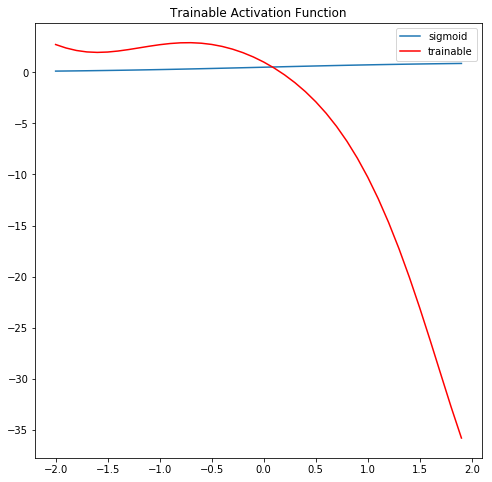

In [78]:
fig = plt.figure(figsize=(8, 8))
plt.plot(x, 1/(1+np.exp(-x)), label='sigmoid')
plt.plot(x, trainable_activation, 'r', label='trainable')
plt.title('Trainable Activation Function')
plt.legend()